# 1.1

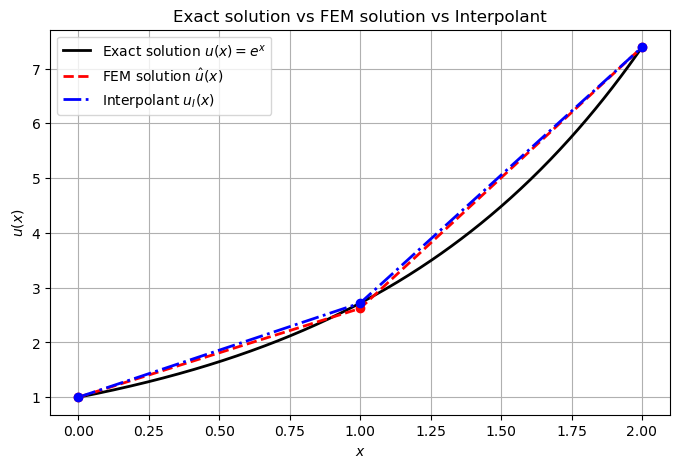

In [1]:
### UNIFORM CASE

import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Exact solution
# -------------------------
def u_exact(x):
    return np.exp(x)

# -------------------------
# Mesh (uniform)
# -------------------------
x_nodes = np.array([0.0, 1.0, 2.0])
h = 1.0

# FEM nodal values (from part b)
u_hat = np.array([
    1.0,
    (5/16)*(1 + np.exp(2)),
    np.exp(2)
])

# -------------------------
# FEM solution û(x)
# -------------------------
def u_fem(x):
    if x <= 1.0:
        # element e1
        N0 = (1 - x)
        N1 = x
        return u_hat[0]*N0 + u_hat[1]*N1
    else:
        # element e2
        N1 = (2 - x)
        N2 = (x - 1)
        return u_hat[1]*N1 + u_hat[2]*N2

# -------------------------
# Interpolant u_I(x)
# -------------------------
uI_nodes = u_exact(x_nodes)

def u_interpolant(x):
    if x <= 1.0:
        N0 = (1 - x)
        N1 = x
        return uI_nodes[0]*N0 + uI_nodes[1]*N1
    else:
        N1 = (2 - x)
        N2 = (x - 1)
        return uI_nodes[1]*N1 + uI_nodes[2]*N2

# -------------------------
# Plot
# -------------------------
x_plot = np.linspace(0, 2, 400)

u_exact_vals = u_exact(x_plot)
u_fem_vals = np.array([u_fem(x) for x in x_plot])
u_interp_vals = np.array([u_interpolant(x) for x in x_plot])

plt.figure(figsize=(8,5))
plt.plot(x_plot, u_exact_vals, 'k-', label='Exact solution $u(x)=e^x$', linewidth=2)
plt.plot(x_plot, u_fem_vals, 'r--', label='FEM solution $\\hat u(x)$', linewidth=2)
plt.plot(x_plot, u_interp_vals, 'b-.', label='Interpolant $u_I(x)$', linewidth=2)
plt.plot(x_nodes, u_hat, 'ro')  # FEM nodes
plt.plot(x_nodes, uI_nodes, 'bo')  # exact nodes

plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.legend()
plt.grid(True)
plt.title('Exact solution vs FEM solution vs Interpolant')
plt.show()

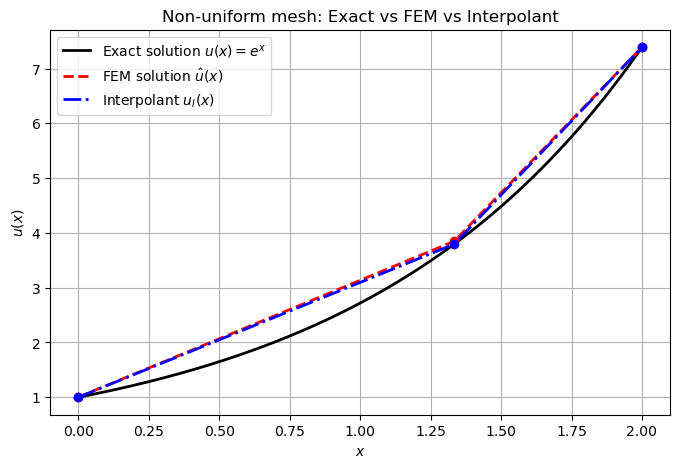

In [2]:
### NON UNIFORM CORRECTED
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Exact solution
# -------------------------
def u_exact(x):
    return np.exp(x)

# -------------------------
# Non-uniform mesh
# -------------------------
x_nodes = np.array([0.0, 4/3, 2.0])

# Correct FEM nodal values
u_hat = np.array([
    1.0,
    19/101 + (50/101)*np.exp(2),
    np.exp(2)
])

# -------------------------
# FEM solution û(x)
# -------------------------
def u_fem(x):
    if x <= x_nodes[1]:
        # Element e1
        h1 = x_nodes[1] - x_nodes[0]
        N0 = (x_nodes[1] - x) / h1
        N1 = (x - x_nodes[0]) / h1
        return u_hat[0]*N0 + u_hat[1]*N1
    else:
        # Element e2
        h2 = x_nodes[2] - x_nodes[1]
        N1 = (x_nodes[2] - x) / h2
        N2 = (x - x_nodes[1]) / h2
        return u_hat[1]*N1 + u_hat[2]*N2

# -------------------------
# Interpolant u_I(x)
# -------------------------
uI_nodes = u_exact(x_nodes)

def u_interpolant(x):
    if x <= x_nodes[1]:
        h1 = x_nodes[1] - x_nodes[0]
        N0 = (x_nodes[1] - x) / h1
        N1 = (x - x_nodes[0]) / h1
        return uI_nodes[0]*N0 + uI_nodes[1]*N1
    else:
        h2 = x_nodes[2] - x_nodes[1]
        N1 = (x_nodes[2] - x) / h2
        N2 = (x - x_nodes[1]) / h2
        return uI_nodes[1]*N1 + uI_nodes[2]*N2

# -------------------------
# Plot
# -------------------------
x_plot = np.linspace(0, 2, 500)

u_exact_vals = u_exact(x_plot)
u_fem_vals = np.array([u_fem(x) for x in x_plot])
u_interp_vals = np.array([u_interpolant(x) for x in x_plot])

plt.figure(figsize=(8,5))
plt.plot(x_plot, u_exact_vals, 'k-', label='Exact solution $u(x)=e^x$', linewidth=2)
plt.plot(x_plot, u_fem_vals, 'r--', label='FEM solution $\\hat u(x)$', linewidth=2)
plt.plot(x_plot, u_interp_vals, 'b-.', label='Interpolant $u_I(x)$', linewidth=2)
plt.plot(x_nodes, u_hat, 'ro')
plt.plot(x_nodes, uI_nodes, 'bo')

plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.legend()
plt.grid(True)
plt.title('Non-uniform mesh: Exact vs FEM vs Interpolant')
plt.show()

# 1.7

In [6]:
### 1.7.a
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Symbol
x = sp.symbols('x')

# Manufactured solution
u = sp.exp(-800*(x-0.4)**2) + 0.25*sp.exp(-40*(x-0.8)**2)

# Second derivative
u_xx = sp.diff(u, x, 2)

# Right-hand side f(x)
f = u_xx - u

# Simplify
f_simplified = f

# --------------------------------------------------
# Print LaTeX output for Overleaf
# --------------------------------------------------
latex_f = sp.latex(f_simplified)

print("LaTeX form of f(x):\n")
print(latex_f)

LaTeX form of f(x):

1600.0 \left(x - 0.8\right)^{2} e^{- 40 \left(x - 0.8\right)^{2}} + 2560000 \left(x - 0.4\right)^{2} e^{- 800 \left(x - 0.4\right)^{2}} - 1601 e^{- 800 \left(x - 0.4\right)^{2}} - 20.25 e^{- 40 \left(x - 0.8\right)^{2}}


In [7]:
### 1.7.a
# Boundary values
c = sp.simplify(u.subs(x, 0))
d = sp.simplify(u.subs(x, 1))
c, d

(1.90546629862822e-12, 0.0504741294986639)

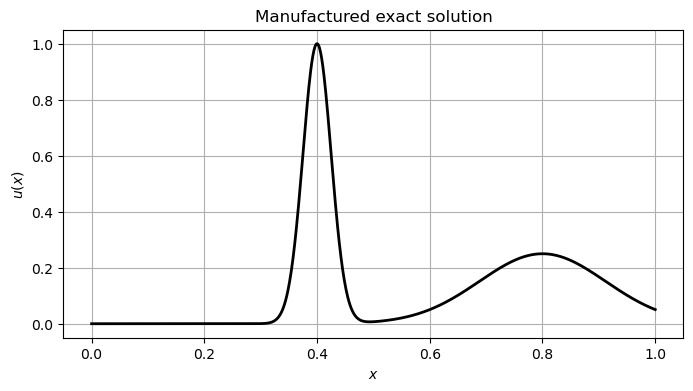

In [8]:
### 1.7.a
# Convert to numerical functions
u_fun = sp.lambdify(x, u, 'numpy')

# Plot
x_vals = np.linspace(0, 1, 1000)
plt.figure(figsize=(8,4))
plt.plot(x_vals, u_fun(x_vals), 'k', linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.title('Manufactured exact solution')
plt.grid(True)
plt.show()

In [9]:
### Correctness of our MMS
f_simplified
fa = (-1601 * sp.exp(-800 * (x - 0.4)**2) + (-1600 * x + 640.0)**2 * sp.exp(-800 * (x - 0.4)**2) - 20.25 * sp.exp(-40 * (x - 0.8)**2) + 0.25 * (-80 * x + 64.0)**2 * sp.exp(-40 * (x - 0.8)**2))
sp.simplify(f_simplified) == sp.simplify(fa)

True